In [1]:
import matplotlib.pyplot as plt 
import plots 
plots.mpltoolkit.load_mpl_presets 
import numpy as np 
import vice 
import sys 
sys.path.append("../") 
import src 
from src.plots.plots.utils import dummy_background_axes 
from src.simulations.yields import linear_agb_yield 

/Users/astrobeard/.local/lib/python3.7/site-packages/vice-1.3.0-py3.7-macosx-10.9-x86_64.egg/vice/__init__.py:136: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)
../src/plots/env.py:42: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  mpl.rcParams["text.latex.preamble"] = [r"\usepackage{amsmath}"]


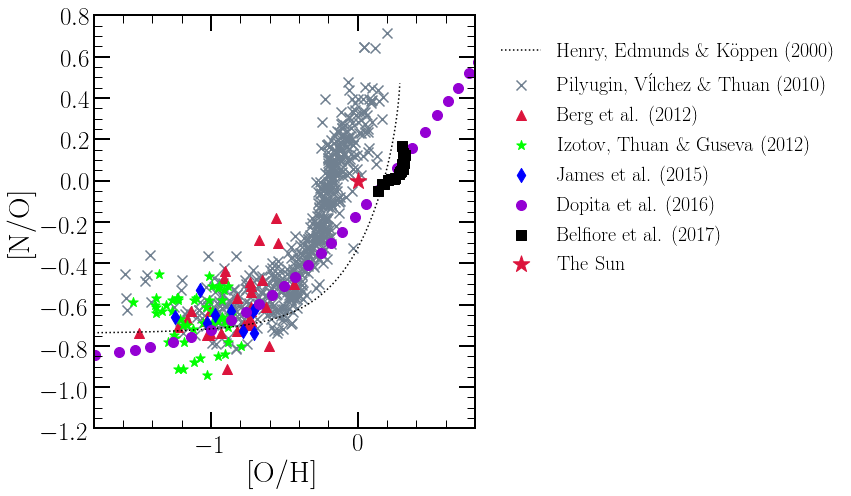

In [2]:
### figure setup ### 
fig = plt.figure(figsize = (12, 7), facecolor = "white") 
ax = fig.add_subplot(111) 
ax.set_xlabel("[O/H]") 
ax.set_ylabel("[N/O]") 
ax.set_xlim([-1.8, 0.8]) 
ax.set_ylim([-1.2, 0.8])
ax.set_yticks([-1.2 + 0.2 * _ for _ in range(11)])   

### Pilyugin, Vilchez & Thuan (2010) ### 
pilyugin2010 = src.data.read("pilyugin2010") 
kwargs = {
    "c": plots.mpltoolkit.named_colors()["slategray"], 
    "marker": plots.mpltoolkit.markers()["x"], 
    "label": r"Pilyugin, V$\acute{\text{i}}$lchez \& Thuan (2010)", 
    "s": 100 
}
ax.scatter(pilyugin2010["[o/h]"], pilyugin2010["[n/o]"], **kwargs) 

### Berg et al. (2012) ### 
berg2012 = src.data.read("berg2012") 
kwargs["c"] = plots.mpltoolkit.named_colors()["crimson"] 
kwargs["marker"] = plots.mpltoolkit.markers()["triangle_up"] 
kwargs["label"] = "Berg et al. (2012)" 
ax.scatter(berg2012["[o/h]"], berg2012["[n/o]"], **kwargs) 

### Izotov, Thuan & Guseva (2012) ### 
izotov2012 = src.data.read("izotov2012") 
kwargs["c"] = plots.mpltoolkit.named_colors()["lime"] 
kwargs["marker"] = plots.mpltoolkit.markers()["star"] 
kwargs["label"] = "Izotov, Thuan \& Guseva (2012)" 
ax.scatter(izotov2012["[o/h]"], izotov2012["[n/o]"], **kwargs) 

### James et al. (2015) ### 
james2015 = src.data.read("james2015") 
kwargs["c"] = plots.mpltoolkit.named_colors()["blue"] 
kwargs["marker"] = plots.mpltoolkit.markers()["thin_diamond"] 
kwargs["label"] = "James et al. (2015)" 
ax.scatter(james2015["[o/h]"], james2015["[n/o]"], **kwargs) 

### Dopita et al. (2016) ### 
dopita2016 = src.data.read("dopita2016") 
kwargs["c"] = plots.mpltoolkit.named_colors()["darkviolet"] 
kwargs["marker"] = plots.mpltoolkit.markers()["circle"] 
kwargs["label"] = "Dopita et al. (2016)" 
ax.scatter(dopita2016["[o/h]"], dopita2016["[n/o]"], **kwargs) 

### Belfiore et al. (2017) ### 
belfiore2017 = src.data.read("belfiore2017") 
kwargs["c"] = plots.mpltoolkit.named_colors()["black"] 
kwargs["marker"] = plots.mpltoolkit.markers()["square"] 
kwargs["label"] = "Belfiore et al. (2017)" 
ax.scatter(belfiore2017["[o/h]"], belfiore2017["[n/o]"], **kwargs) 

### Henry, Edmunds & Koeppen (2000) 
henry2000 = src.no_oh_relation.Henry2000() 
xvals = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 1000) 
yvals = [henry2000(_) for _ in xvals] 
ax.plot(xvals, yvals, c = plots.mpltoolkit.named_colors()["black"], 
    linestyle = ':', label = r"Henry, Edmunds \& K$\ddot{\text{o}}$ppen (2000)") 

### the sun ### 
ax.scatter([0], [0], c = plots.mpltoolkit.named_colors()["crimson"], 
    marker = plots.mpltoolkit.markers()["star"], s = 300, zorder = 100, 
    label = "The Sun")

### Legend ### 
kwargs = {
    "loc": plots.mpltoolkit.mpl_loc("upper left"), 
    "ncol": 1, 
    "frameon": False, 
    "fontsize": 20, 
    "bbox_to_anchor": (1.02, 0.98) 
} 
ax.legend(**kwargs) 
plt.tight_layout() 
plt.savefig("../paper/no_oh_observed.pdf") 

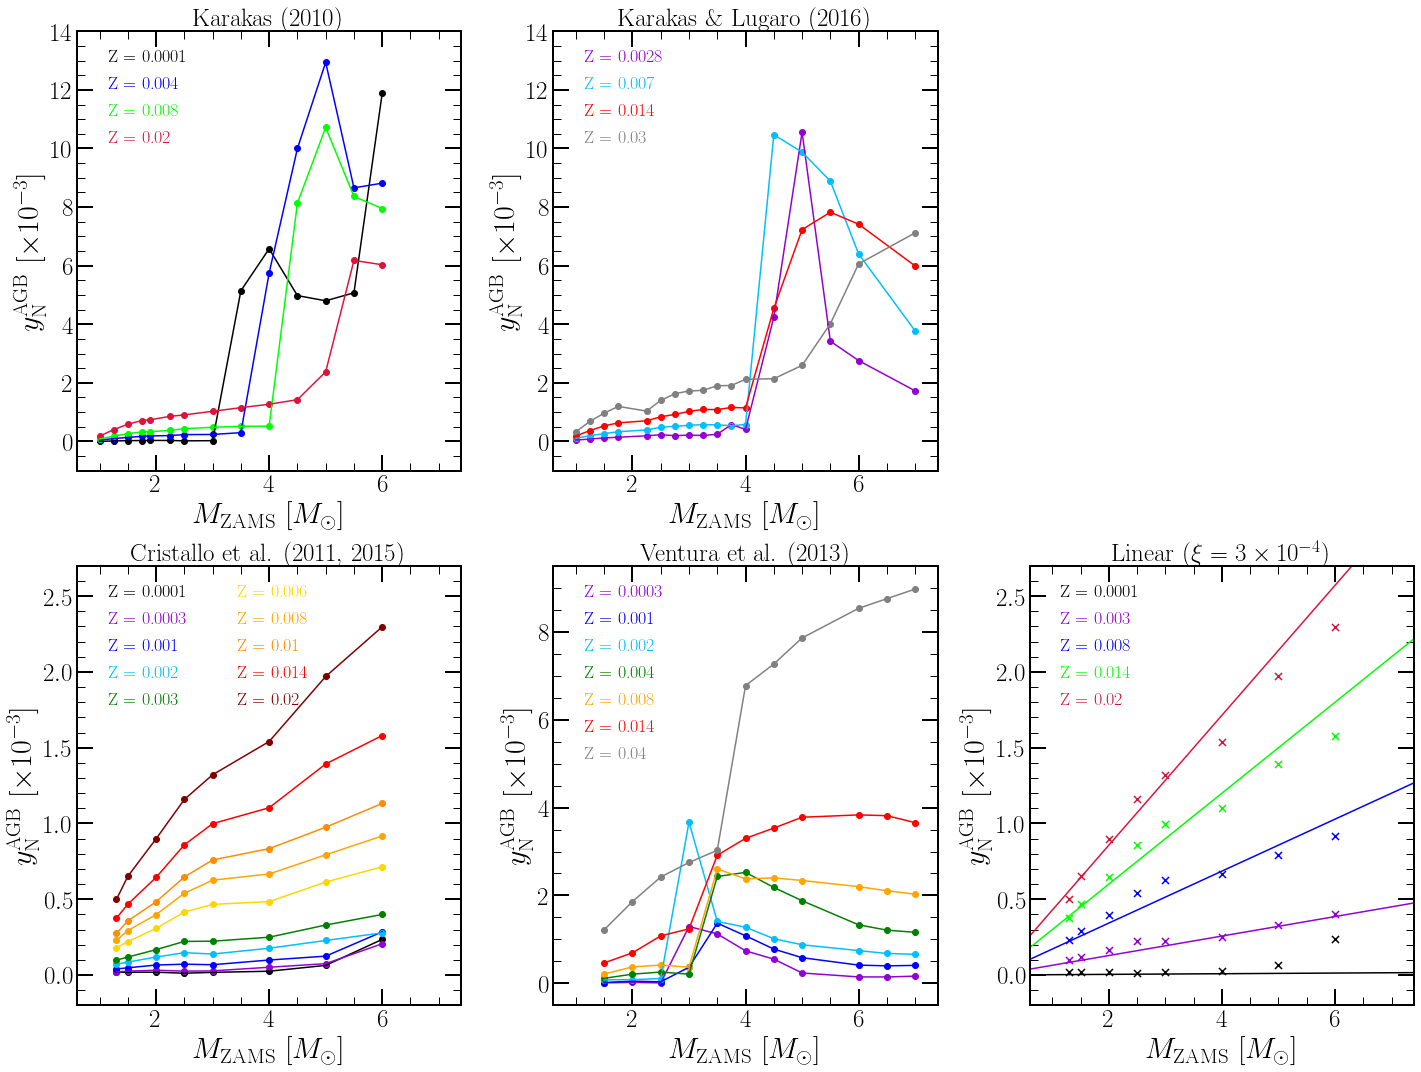

In [3]:
logprefactor = 3 # overall factor of 10^(-logprefactor) 

### figure setup ### 
fig = plt.figure(figsize = (20, 15), facecolor = "white") 
axes = [] 
# ylim = [[-0.2, 2.7], [-1, 14], None, [-0.5, 9.5], [-1, 14], [-0.2, 2.7]] 
ylim = [[-1, 14], [-1, 14], None, [-0.2, 2.7], [-0.5, 9.5], [-0.2, 2.7]] 
# labels = ["Cristallo et al. (2011, 2015)", "Karakas (2010)", None, "Ventura et al. (2013)", 
#     "Karakas \& Lugaro (2016)", r"Linear ($\xi$ = 0.02)"] 
labels = ["Karakas (2010)", "Karakas \& Lugaro (2016)", None, "Cristallo et al. (2011, 2015)", 
          "Ventura et al. (2013)", r"Linear ($\xi = 3\times10^{-4}$)"] 
for i in range(6): 
    if i == 2: continue 
    axes.append(fig.add_subplot(231 + i)) 
#     if i == 3: 
    axes[i - int(i > 2)].set_xlabel(r"$M_\text{ZAMS}$ [$M_\odot$]") 
    axes[i - int(i > 2)].set_ylabel(r"$y_\text{N}^\text{AGB}$ [$\times10^{-3}$]") 
#     else: 
#         plt.setp(axes[i].get_xticklabels(), visible = False) 
    axes[i - int(i > 2)].set_xlim([0.6, 7.4]) 
    axes[i - int(i > 2)].set_ylim(ylim[i]) 
#     axes[i].yaxis.set_label_position("right") 
#     axes[i].set_title(labels[i], rotation = 270, labelpad = 30) 
    axes[i - int(i > 2)].set_title(labels[i], fontsize = 25)
# dummy = dummy_background_axes([axes]) 
# dummy.set_ylabel(r"$y_\text{N}^\text{AGB}$ [$\times10^{-3}$]", labelpad = 40) 

### colors to plot each study's table in - each of the same length as the metallicities ### 
# colors = {
#     "cristallo11": ["black", "darkviolet", "blue", "deepskyblue", 
#                     "green", "gold", "orange", "darkorange", "red", "maroon"], 
#     "karakas10": ["black", "green", "orange", "maroon"], 
#     "ventura13": ["darkviolet", "blue", "deepskyblue", "green", "orange", "red", "grey"], 
#     "karakas16": ["green", "orange", "red", "grey"] 
# } 
colors = {
    "cristallo11": ["black", "darkviolet", "blue", "deepskyblue", 
                    "green", "gold", "orange", "darkorange", "red", "maroon"], 
    "karakas10": ["black", "blue", "lime", "crimson"], 
    "ventura13": ["darkviolet", "blue", "deepskyblue", "green", "orange", "red", "grey"], 
    "karakas16": ["darkviolet", "deepskyblue", "red", "grey"] 
} 
# studies = ["cristallo11", "karakas10", None, "ventura13", "karakas16"] 
studies = ["karakas10", "karakas16", None, "cristallo11", "ventura13"] 
legend_kwargs = {
    "loc": plots.mpltoolkit.mpl_loc("upper left"), 
    "frameon": False, 
    "handlelength": 0, 
    "fontsize": 18 
}
for i in range(5): ### for each published table 
    if i == 2: continue 
    y, m, z = vice.yields.agb.grid('n', study = studies[i]) 
    for j in range(len(z)): ### for each metallicity they report yields at 
        # plot points connected by lines 
        yields = [10**logprefactor * _[j] for _ in y] 
        kwargs = {"c": plots.mpltoolkit.named_colors()[colors[studies[i]][j]]} 
        axes[i - int(i > 2)].scatter(m, yields, **kwargs) 
        kwargs["label"] = "Z = %g" % (z[j]) 
        axes[i - int(i > 2)].plot(m, yields, **kwargs) 
    leg = axes[i - int(i > 2)].legend(ncol = 2 if i == 3 else 1, **legend_kwargs) 
    for j in range(len(z)): 
        leg.get_texts()[j].set_color(colors[studies[i]][j]) 
        leg.legendHandles[j].set_visible(False) 
        
### The linear model, with a few reference points from Cristallo et al. (2011, 2015) 
Z = [0.0001, 0.003, 0.008, 0.014, 0.02] 
# colors = ["black", "green", "orange", "red", "maroon"] 
colors = ["black", "darkviolet", "blue", "lime", "crimson"] 
model = linear_agb_yield(slope = 3.0e-4) 
y, m, z = vice.yields.agb.grid('n', study = "cristallo11") 
for i in range(len(Z)): 
    masses = np.linspace(axes[-1].get_xlim()[0], axes[-1].get_xlim()[1], 1000) 
    yields = [10**logprefactor * model(mass, Z[i]) for mass in masses] 
    kwargs = {"c": plots.mpltoolkit.named_colors()[colors[i]]} 
    idx = z.index(Z[i]) 
    yields_ = [10**logprefactor * _[idx] for _ in y] 
    axes[-1].scatter(m, yields_, marker = plots.mpltoolkit.markers()["x"], s = 50, **kwargs) 
    kwargs["label"] = "Z = %g" % (Z[i]) 
    axes[-1].plot(masses, yields, **kwargs) 
leg = axes[-1].legend(ncol = 1, **legend_kwargs) 
for i in range(len(Z)): 
    leg.get_texts()[i].set_color(colors[i]) 
    leg.legendHandles[i].set_visible(False) 


plt.tight_layout() 
# plt.subplots_adjust(hspace = 0) 
plt.savefig("../paper/agb_yield_models.pdf") 

/Users/astrobeard/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: ScienceWarning: Supernovae yields from the Nomoto, Kobayashi & Tominaga (2013), ARA&A, 51, 457 study are sampled on a grid of stellar masses up to 40 Msun at this metallicity. Employing an upper mass limit larger than this may introduce numerical artifacts. Got: 100 Msun
/Users/astrobeard/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: ScienceWarning: Supernovae yields from the Nomoto, Kobayashi & Tominaga (2013), ARA&A, 51, 457 study are sampled on a grid of stellar masses up to 40 Msun at this metallicity. Employing an upper mass limit larger than this may introduce numerical artifacts. Got: 100 Msun
/Users/astrobeard/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: ScienceWarning: Supernovae yields from the Woosley & Weaver (1995) ApJ, 101, 181 study are sampled on a grid of stellar masses up to 40 Msun at this metallicity. Employing an upper mass limit larger than this m

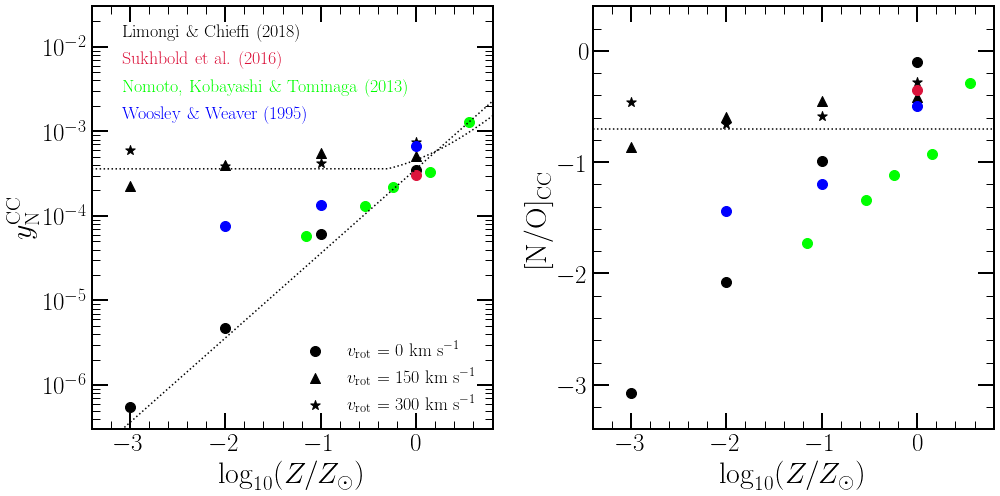

In [21]:
fig = plt.figure(figsize = (14, 7), facecolor = "white") 
ax1 = fig.add_subplot(121) 
ax2 = fig.add_subplot(122) 
ax1.set_xlabel(r"$\log_{10} (Z / Z_\odot)$") 
ax2.set_xlabel(r"$\log_{10} (Z / Z_\odot)$") 
ax1.set_ylabel(r"$y_\text{N}^\text{CC}$") 
# ax2.set_ylabel(r"$\log_{10}\text{(N/O)}_\text{CC}$") 
ax2.set_ylabel(r"[N/O]$_\text{CC}$") 
ax1.set_yscale("log") 
ax1.set_xlim([-3.4, 0.8]) 
ax2.set_xlim([-3.4, 0.8]) 
ax1.set_ylim([3.e-7, 3.e-2]) 
ax2.set_ylim([-3.4, 0.4]) 
ax2.set_yticks([-3, -2, -1, 0]) 
studies = ["LC18", "S16/W18", "NKT13", "WW95"] 
names = {
    "LC18": "Limongi \& Chieffi (2018)", 
    "NKT13": "Nomoto, Kobayashi \& Tominaga (2013)", 
    "S16/W18": "Sukhbold et al. (2016)", 
    "WW95": "Woosley \& Weaver (1995)" 
}
metallicities = {
    "LC18": [-3, -2, -1, 0], 
    "NKT13": [-1.15, -0.54, -0.24, 0.15, 0.55], 
    "S16/W18": [0], 
    "WW95": [-4, -2, -1, 0] 
} 
rotation = {
    "LC18": [0, 150, 300], 
    "NKT13": [0], 
    "S16/W18": [0], 
    "WW95": [0] 
}
markers = {
    0: "circle", 
    150: "triangle_up", 
    300: "star" 
}
colors = {
    "LC18": "black", 
    "NKT13": "lime", 
    "S16/W18": "crimson", 
    "WW95": "blue" 
}

for i in studies: 
    for j in metallicities[i]: 
        for k in rotation[i]: 
            kwargs = {
                "c": plots.mpltoolkit.named_colors()[colors[i]], 
                "marker": plots.mpltoolkit.markers()[markers[k]], 
                "s": 100 
            }
            y_n_cc, _ = vice.yields.ccsne.fractional('n', study = i, MoverH = j, rotation = k) 
            y_o_cc, _ = vice.yields.ccsne.fractional('o', study = i, MoverH = j, rotation = k) 
#             cc_ratio = np.log10(y_n_cc / y_o_cc) - np.log10(14.007 / 15.999) 
            cc_ratio = np.log10(y_n_cc / y_o_cc) - np.log10(vice.solar_z['n'] / vice.solar_z['o']) 
            ax1.scatter(j, y_n_cc, **kwargs)
            ax2.scatter(j, cc_ratio, **kwargs) 
ax2.plot(ax2.get_xlim(), 2 * [-0.7], c = plots.mpltoolkit.named_colors()["black"], 
    linestyle = ':') 
            
lines = len(studies) * [None] 
for i in range(len(lines)): 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()[colors[studies[i]]], 
        "label": names[studies[i]] 
    }
    lines[i] = ax1.plot([0, 0], [1, 1], **kwargs)[0] 
leg = ax1.legend(loc = plots.mpltoolkit.mpl_loc("upper left"), fontsize = 18, ncol = 1, 
    frameon = False, handlelength = 0) 
ax1.add_artist(leg) 
for i in range(len(lines)): 
    leg.get_texts()[i].set_color(colors[studies[i]]) 
    leg.legendHandles[i].set_visible(False) 
    lines[i].remove() 
points = len(rotation["LC18"]) * [None] 
for i in range(len(points)): 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()["black"], 
        "marker": plots.mpltoolkit.markers()[markers[rotation["LC18"][i]]], 
        "label": r"$v_\text{rot}$ = %g km s$^{-1}$" % (rotation["LC18"][i]), 
        "s": 100 
    } 
    points[i] = ax1.scatter([0, 0], [1, 1], **kwargs) 
ax1.legend(loc = plots.mpltoolkit.mpl_loc("lower right"), fontsize = 18, ncol = 1, 
    frameon = False) 
for i in range(len(points)): 
    points[i].remove() 
    
def broken(z): 
    y = 3.6e-4 
    if z >= 0.007: y += 2.e-4 * ((z - 0.007) / 0.014)
    return y 
xvals = np.linspace(-3.4, 0.8, 1000) 
yvals = [broken(0.014 * 10**_) for _ in xvals] 
ax1.plot(xvals, yvals, c = plots.mpltoolkit.named_colors()["black"], linestyle = ':') 

def notbroken(z): 
    return 3.6e-4 * (z / 0.014) 
yvals = [notbroken(0.014 * 10**_) for _ in xvals] 
ax1.plot(xvals, yvals, c = plots.mpltoolkit.named_colors()["black"], linestyle = ':')

plt.tight_layout() 
plt.subplots_adjust(wspace = 0.25)
plt.savefig("../paper/n_cc_yields.pdf") 

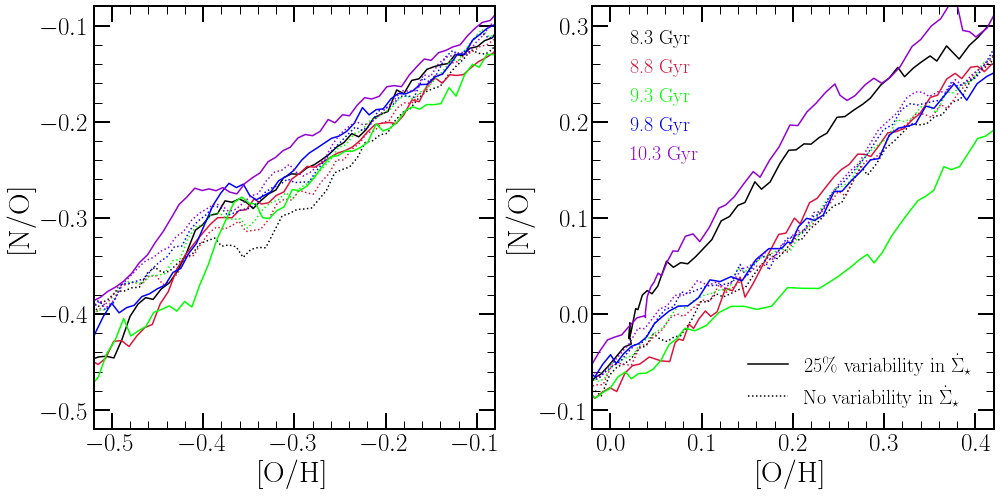

In [32]:
fig = plt.figure(figsize = (14, 7), facecolor = "white") 
ax1 = fig.add_subplot(121) 
ax2 = fig.add_subplot(122) 
# ax = fig.add_subplot(111) 
# dummy = dummy_background_axes([[ax1, ax2]]) 
# dummy.set_xlabel("[O/H]", labelpad = 30) 
# dummy.set_ylabel("[N/O]", labelpad = 60) 
for ax in [ax1, ax2]: 
    ax.set_xlabel("[O/H]") 
    ax.set_ylabel("[N/O]") 
# ax1.set_xlim([-1.1, 0.7]) 
# ax1.set_ylim([-0.7, 0.35]) 
ax1.set_xlim([-0.52, -0.08]) 
ax1.set_ylim([-0.52, -0.08])
ax2.set_xlim([-0.02, 0.42]) 
ax2.set_ylim([-0.12, 0.32]) 

legend_kwargs = {
    "loc": plots.mpltoolkit.mpl_loc("lower right"), 
    "ncol": 1, 
    "frameon": False, 
    "fontsize": 20, 
    "bbox_to_anchor": (0.99, 0.01), 
}
line1 = ax2.plot([1, 2], [1, 2], c = plots.mpltoolkit.named_colors()["black"], 
    label = r"25\% variability in $\dot{\Sigma}_\star$")[0]
line2 = ax2.plot([1, 2], [1, 2], c = plots.mpltoolkit.named_colors()["black"], 
    label = r"No variability in $\dot{\Sigma}_\star$", linestyle = ':')[0] 
leg = ax2.legend(**legend_kwargs) 
ax2.add_artist(leg) 
line1.remove() 
line2.remove() 

insideout = vice.output("../outputs/diffusion/insideout") 
modulated = vice.output("../outputs/diffusion/modulated") 
# times = [6., 6.5, 7., 7.5, 8.] 
# times = [8., 8.5, 9., 9.5, 10.0] 
times = [8.3, 8.8, 9.3, 9.8, 10.3] 
colors = ["black", "crimson", "lime", "blue", "darkviolet"] 
zones = ["zone%d" % (_) for _ in range(20, 155)] 
for ax in [ax1, ax2]: 
    for i in range(len(times)): 
        diff = [abs(_ - times[i]) for _ in insideout.zones["zone0"].history["time"]] 
        idx = diff.index(min(diff)) 
        kwargs = {"c": plots.mpltoolkit.named_colors()[colors[i]]} 
        xvals = [insideout.zones[zone].history["[o/h]"][idx] for zone in zones] 
        yvals = [insideout.zones[zone].history["[n/o]"][idx] for zone in zones] 
        ax.plot(xvals, yvals, linestyle = ':', **kwargs) 
        kwargs["label"] = "%g Gyr" % (times[i]) 
        xvals = [modulated.zones[zone].history["[o/h]"][idx] for zone in zones] 
        yvals = [modulated.zones[zone].history["[n/o]"][idx] for zone in zones] 
        ax.plot(xvals, yvals, **kwargs) 
legend_kwargs["handlelength"] = 0 
legend_kwargs["loc"] = plots.mpltoolkit.mpl_loc("upper left") 
legend_kwargs["bbox_to_anchor"] = (0.01, 0.99) 
leg = ax2.legend(**legend_kwargs) 
for i in range(len(colors)): 
    leg.get_texts()[i].set_color(colors[i]) 
    leg.legendHandles[i].set_visible(False) 
plt.tight_layout() 
plt.savefig("../paper/no_oh_modsfr.pdf") 

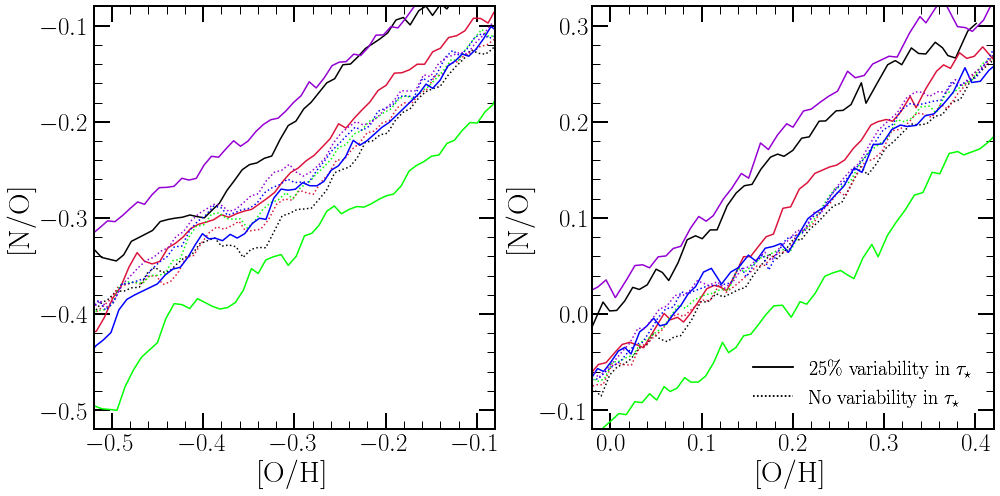

In [34]:
fig = plt.figure(figsize = (14, 7), facecolor = "white") 
ax1 = fig.add_subplot(121) 
ax2 = fig.add_subplot(122) 
for ax in [ax1, ax2]: 
    ax.set_xlabel("[O/H]") 
    ax.set_ylabel("[N/O]") 
ax1.set_xlim([-0.52, -0.08]) 
ax1.set_ylim([-0.52, -0.08])
ax2.set_xlim([-0.02, 0.42]) 
ax2.set_ylim([-0.12, 0.32]) 

legend_kwargs = {
    "loc": plots.mpltoolkit.mpl_loc("lower right"), 
    "ncol": 1, 
    "frameon": False, 
    "fontsize": 20, 
    "bbox_to_anchor": (0.99, 0.01), 
}
line1 = ax2.plot([1, 2], [1, 2], c = plots.mpltoolkit.named_colors()["black"], 
    label = r"25\% variability in $\tau_\star$")[0]
line2 = ax2.plot([1, 2], [1, 2], c = plots.mpltoolkit.named_colors()["black"], 
    label = r"No variability in $\tau_\star$", linestyle = ':')[0] 
leg = ax2.legend(**legend_kwargs) 
ax2.add_artist(leg) 
line1.remove() 
line2.remove() 

insideout = vice.output("../outputs/diffusion/insideout") 
modulated = vice.output("../outputs/diffusion/modulated_sfe") 
# times = [6., 6.5, 7., 7.5, 8.] 
# times = [8., 8.5, 9., 9.5, 10.0] 
times = [8.3, 8.8, 9.3, 9.8, 10.3] 
colors = ["black", "crimson", "lime", "blue", "darkviolet"] 
zones = ["zone%d" % (_) for _ in range(20, 155)] 
for ax in [ax1, ax2]: 
    for i in range(len(times)): 
        diff = [abs(_ - times[i]) for _ in insideout.zones["zone0"].history["time"]] 
        idx = diff.index(min(diff)) 
        kwargs = {"c": plots.mpltoolkit.named_colors()[colors[i]]} 
        xvals = [insideout.zones[zone].history["[o/h]"][idx] for zone in zones] 
        yvals = [insideout.zones[zone].history["[n/o]"][idx] for zone in zones] 
        ax.plot(xvals, yvals, linestyle = ':', **kwargs) 
        kwargs["label"] = "%g Gyr" % (times[i]) 
        xvals = [modulated.zones[zone].history["[o/h]"][idx] for zone in zones] 
        yvals = [modulated.zones[zone].history["[n/o]"][idx] for zone in zones] 
        ax.plot(xvals, yvals, **kwargs) 
# legend_kwargs["handlelength"] = 0 
# legend_kwargs["loc"] = plots.mpltoolkit.mpl_loc("upper left") 
# legend_kwargs["bbox_to_anchor"] = (0.01, 0.99) 
# leg = ax2.legend(**legend_kwargs) 
# for i in range(len(colors)): 
#     leg.get_texts()[i].set_color(colors[i]) 
#     leg.legendHandles[i].set_visible(False) 
plt.tight_layout() 
plt.savefig("../paper/no_oh_modsfe.pdf") 

/Users/astrobeard/.local/lib/python3.7/site-packages/vice-1.3.0-py3.7-macosx-10.9-x86_64.egg/vice/core/outputs/output.py:131: UserWarning: agb n yield not encoded with output. Assuming the current yield setting, which may not reflect the yield setting at the time the simulation was ran.
  self.__c_version = c_output(name)


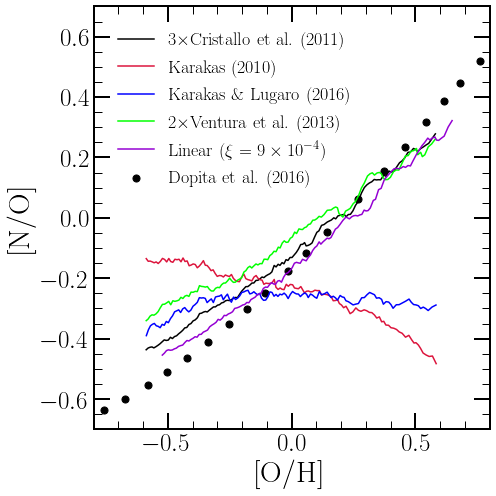

In [28]:
fig = plt.figure(figsize = (7, 7), facecolor = "white") 
ax = fig.add_subplot(111, facecolor = "white") 
ax.set_xlabel("[O/H]") 
ax.set_ylabel("[N/O]") 
ax.set_xlim([-0.8, 0.8]) 
ax.set_ylim([-0.7, 0.7]) 
names = [
    "../outputs/diffusion/insideout_3xcristallo", 
    "../outputs/diffusion/insideout_karakas10", 
    "../outputs/diffusion/insideout_karakas16", 
    "../outputs/diffusion/insideout_ventura13", 
    "../outputs/diffusion/insideout_linear2" 
]
# names = [
#     "../outputs/diffusion/insideout", 
#     "../outputs/diffusion/insideout_3xcristallo", 
#     "../outputs/diffusion/insideout_2xcristallo" 
# ]
outputs = [vice.output(_) for _ in names] 
# colors = ["black", "crimson", "darkviolet", "blue", "lime"] 
colors = ["black", "crimson", "blue", "lime", "darkviolet"] 
# colors = ["black", "red", "blue"] 
zones = ["zone%d" % (_) for _ in range(20, 151)] 
labels = [
#     r"4$\times$Cristallo et al. (2011)", 
    r"3$\times$Cristallo et al. (2011)", 
    "Karakas (2010)", 
    "Karakas \& Lugaro (2016)", 
    r"2$\times$Ventura et al. (2013)", 
    r"Linear ($\xi = 9\times10^{-4}$)" 
]
# labels = [
#     r"4$\times$Cristallo et al. (2011, 2015)", 
#     r"3$\times$Cristallo et al. (2011, 2015)", 
#     r"2$\times$Cristallo et al. (2011, 2015)" 
# ]
for i in range(len(outputs)): 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()[colors[i]], 
        "label": labels[i] 
    } 
    xvals = [outputs[i].zones[_].history["[o/h]"][-1] for _ in zones] 
    yvals = [outputs[i].zones[_].history["[n/o]"][-1] for _ in zones] 
    ax.plot(xvals, yvals, **kwargs) 
dopita2016 = src.data.read("dopita2016") 
kwargs = {
    "c": plots.mpltoolkit.named_colors()["black"], 
    "marker": plots.mpltoolkit.markers()["circle"], 
    "label": "Dopita et al. (2016)", 
    "s": 50 
} 
ax.scatter(dopita2016["[o/h]"], dopita2016["[n/o]"], **kwargs) 
kwargs = {
    "loc": plots.mpltoolkit.mpl_loc("upper left"), 
    "ncol": 1, 
    "frameon": False, 
    "fontsize": 18, 
    "bbox_to_anchor": (0.02, 0.98), 
#     "handlelength": 0 
}
leg = ax.legend(**kwargs) 
# for i in range(len(colors)): 
#     leg.get_texts()[i].set_color(colors[i]) 
#     leg.legendHandles[i].set_visible(False) 
plt.tight_layout() 
plt.savefig("../paper/no_oh_predictions.pdf") 

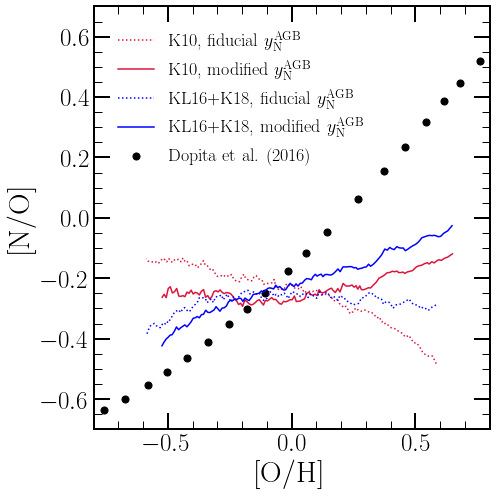

In [29]:
fig = plt.figure(figsize = (7, 7), facecolor = "white") 
ax = fig.add_subplot(111, facecolor = "white") 
ax.set_xlabel("[O/H]") 
ax.set_ylabel("[N/O]") 
ax.set_xlim([-0.8, 0.8]) 
ax.set_ylim([-0.7, 0.7]) 
names = [
    "../outputs/diffusion/insideout_karakas10", 
    "../outputs/diffusion/insideout_karakas10_linearcc", 
    "../outputs/diffusion/insideout_karakas16", 
    "../outputs/diffusion/insideout_karakas16_brokencc" 
]
outputs = [vice.output(_) for _ in names] 
colors = ["crimson", "crimson", "blue", "blue"] 
linestyles = [':', '-', ':', '-'] 
zones = ["zone%d" % (_) for _ in range(20, 151)] 
labels = [
    r"K10, fiducial $y_\text{N}^\text{AGB}$", 
    r"K10, modified $y_\text{N}^\text{AGB}$", 
    r"KL16+K18, fiducial $y_\text{N}^\text{AGB}$", 
    r"KL16+K18, modified $y_\text{N}^\text{AGB}$" 
]
for i in range(len(outputs)): 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()[colors[i]], 
        "label": labels[i], 
        "linestyle": linestyles[i] 
    } 
    xvals = [outputs[i].zones[_].history["[o/h]"][-1] for _ in zones] 
    yvals = [outputs[i].zones[_].history["[n/o]"][-1] for _ in zones] 
    ax.plot(xvals, yvals, **kwargs) 
dopita2016 = src.data.read("dopita2016") 
kwargs = {
    "c": plots.mpltoolkit.named_colors()["black"], 
    "marker": plots.mpltoolkit.markers()["circle"], 
    "label": "Dopita et al. (2016)", 
    "s": 50 
} 
ax.scatter(dopita2016["[o/h]"], dopita2016["[n/o]"], **kwargs) 
kwargs = {
    "loc": plots.mpltoolkit.mpl_loc("upper left"), 
    "ncol": 1, 
    "frameon": False, 
    "fontsize": 18, 
    "bbox_to_anchor": (0.02, 0.98), 
}
leg = ax.legend(**kwargs) 
# for i in range(len(colors)): 
#     leg.get_texts()[i].set_color(colors[i]) 
#     leg.legendHandles[i].set_visible(False) 
plt.tight_layout() 
plt.savefig("../paper/no_oh_predictions_karakas.pdf") 

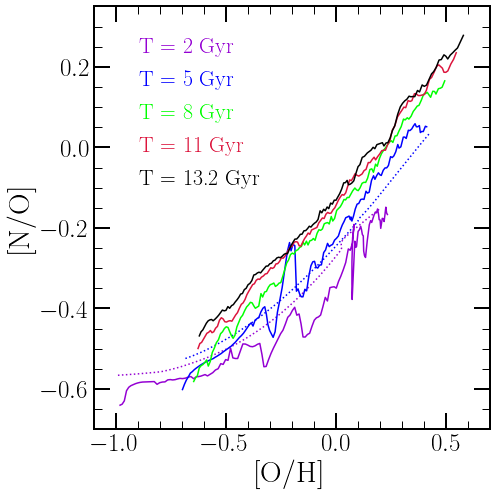

In [26]:
fig = plt.figure(figsize = (7, 7), facecolor = "white") 
ax = fig.add_subplot(111, facecolor = "white") 
ax.set_xlabel("[O/H]") 
ax.set_ylabel("[N/O]") 
ax.set_xlim([-1.1, 0.7]) 
ax.set_ylim([-0.7, 0.35])
times = [2, 5, 8, 11, 13.2] 
colors = ["darkviolet", "blue", "lime", "crimson", "black"] 
# linestyles = ['-.', ':', '-', '--', '-'] 
diffusion = vice.output("../outputs/diffusion/insideout_3xcristallo") 
postprocess = vice.output("../outputs/post-process/insideout_3xcristallo") 
zones = ["zone%d" % (_) for _ in range(20, 155)] 
for i in range(len(times)): 
    idx = postprocess.zones["zone0"].history["time"].index(times[i]) 
    oh = [postprocess.zones[zone].history["[o/h]"][idx] for zone in zones] 
    no = [postprocess.zones[zone].history["[n/o]"][idx] for zone in zones] 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()[colors[i]] 
    } 
    if i < 2: ax.plot(oh, no, linestyle = ':', zorder = 5, **kwargs) 
    idx = diffusion.zones["zone0"].history["time"].index(times[i]) 
    oh = [diffusion.zones[zone].history["[o/h]"][idx] for zone in zones] 
    no = [diffusion.zones[zone].history["[n/o]"][idx] for zone in zones] 
#     kwargs = {
#         "c": plots.mpltoolkit.named_colors()[colors[i]], 
#         "linestyle": linestyles[i], 
#         "label": "T = %g Gyr" % (times[i]) 
#     } 
    kwargs["label"] = "T = %g Gyr" % (times[i]) 
    ax.plot(oh, no, zorder = 10, **kwargs) 
kwargs = {
    "loc": plots.mpltoolkit.mpl_loc("upper left"), 
    "ncol": 1, 
    "frameon": False, 
    "bbox_to_anchor": (0.02, 0.98), 
    "fontsize": 22, 
    "handlelength": 0 
} 
leg = ax.legend(**kwargs) 
for i in range(len(times)): 
    leg.get_texts()[i].set_color(colors[i]) 
    leg.legendHandles[i].set_visible(False) 
plt.tight_layout() 
plt.savefig("../paper/no_oh_timeevol.pdf") 

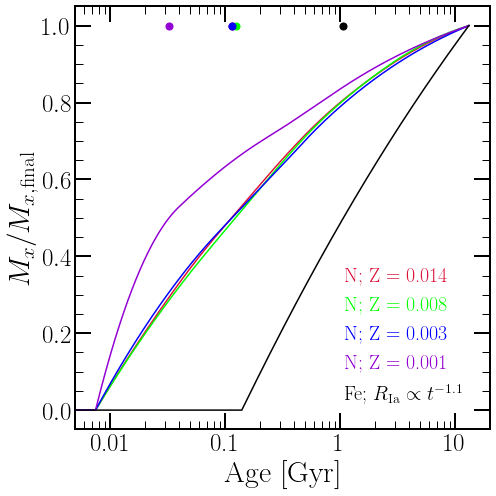

In [25]:
total_time = 13.2 # Gyr, total time to run SSP calculation for
fig = plt.figure(figsize = (7, 7), facecolor = "white") 
ax = fig.add_subplot(111) 
ax.set_xscale("log") 
ax.set_xlabel("Age [Gyr]") 
ax.set_ylabel(r"$M_x/M_{x,\text{final}}$") 
plots.mpltoolkit.xticklabel_formatter(ax) 
ax.set_xlim([0.005, 20]) 
ax.set_ylim([-0.05, 1.05]) 
vice.yields.ccsne.settings['fe'] = 0.0 
vice.yields.sneia.settings['fe'] = 0.0017 
vice.yields.ccsne.settings['n'] = 0 
vice.yields.agb.settings['n'] = "cristallo11"
metallicities = [0.014, 0.008, 0.003, 0.001] 
colors = ["crimson", "lime", "blue", "darkviolet"] 
for i in range(len(metallicities)): 
    mass, time = vice.single_stellar_population('n', Z = metallicities[i], 
        time = total_time, dt = 1.e-4) 
    mass = [_ / mass[-1] for _ in mass] 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()[colors[i]], 
        "label": "N; Z = %g" % (metallicities[i]) 
    } 
    ax.plot(time, mass, **kwargs) 
    diff = [abs(_ - 0.5) for _ in mass] 
    idx = diff.index(min(diff)) 
    ax.scatter(time[idx], 1.0, c = plots.mpltoolkit.named_colors()[colors[i]], 
        marker = plots.mpltoolkit.markers()["circle"], s = 50) 
#     ax.plot(2 * [time[idx]], ax.get_ylim(), c = plots.mpltoolkit.named_colors()[colors[i]], 
#         linestyle = ':') 
mass, time = vice.single_stellar_population('fe', time = total_time) 
mass = [_ / mass[-1] for _ in mass] 
kwargs = {
    "c": plots.mpltoolkit.named_colors()["black"], 
    "label": r"Fe; $R_\text{Ia} \propto t^{-1.1}$" 
} 
ax.plot(time, mass, **kwargs) 
diff = [abs(_ - 0.5) for _ in mass] 
idx = diff.index(min(diff)) 
ax.scatter([time[idx]], 1.0, c = plots.mpltoolkit.named_colors()["black"], 
    marker = plots.mpltoolkit.markers()["circle"], s = 50)
# ax.plot(2 * [time[idx]], ax.get_ylim(), c = plots.mpltoolkit.named_colors()["black"], 
#     linestyle = ':') 
leg = ax.legend(loc = plots.mpltoolkit.mpl_loc("lower right"), ncol = 1, frameon = False, 
    fontsize = 20, handlelength = 0, bbox_to_anchor = (0.98, 0.02)) 
for i in range(len(metallicities)): 
    leg.get_texts()[i].set_color(colors[i]) 
    leg.legendHandles[i].set_visible(False) 
leg.legendHandles[i + 1].set_visible(False) 

plt.tight_layout() 
plt.savefig("../paper/ssp_production.pdf") 